#### ----- 노트 -----
##### df type
- df에 여러 컬럼 받아오는 경우 : 2차원
- df에 한 컬럼만 받아오는 경우 : 1차원 == 시리즈

---
---

## 01. 시각화와 그래프 정리 
(선그래프, 막대그래프, 파이차트, 히스토그램, 산점도)

### 어느 그래프가 어울릴까?

- 냥냥동물병원에 고양이 20,000 마리의 몸무게 데이터가 있습니다. 고양이들의 몸무게가 어떻게 분포하고 있는지 몸무게의 범위를 나눠서 알아보려고 합니다. 어떤 시각화 방법을 사용하면 의미 있는 결과를 얻을 수 있을까요? 
    - 데이터 칼럼이 많음, "분포", "범위" => 히스토그램
- 하루 평균 습도와 그 날의 화재 발생 횟수에 대한 10년치 데이터가 있습니다. 소방서에서는 습도와 화재 발생 횟수 사이에 어떤 상관 관계가 있는지 파악해보려고 합니다. 어떤 그래프를 이용하는 것이 좋을지 골라보세요.
    - 데이터 칼럼이 많음, "상관관계" => 산점도
- 코드잇에서 신규 과목 5개를 출시하였습니다. 이 5개 과목에서 1년 동안 발생한 매출의 비율을 비교해보려고 합니다. 가장 적합하다고 생각하는 그래프를 골라주세요.
    - 데이터 칼럼이 적음, "비교" => 파이 그래프 (1년 동안 발생한 전체 매출을 원 전체로.. 각과목이 차지하는 비율 확인 가능)
---
---

##### Step3-3 데이터 분석과 시각화 
###### 소개
데이터를 분석한 결과를 누구나 쉽게 이해할 수 있도록 시각적으로 표현하는 것도 매우 중요한데요. 이때 그래프를 사용하면 데이터에 있는 패턴을 효과적으로 표현할 수 있습니다. 스타벅스 음료 칼로리 정보, 실리콘 밸리 직업 데이터, 국가별 경제 성장 데이터 등 다양한 데이터를 직접 분석해 보면서 간단한 코드 몇 줄로 예쁜 그래프를 그리는 방법을 배워 보세요!

### 01. 시각화의 두가지 목적
#### 목적 (1) : 분석에 도움을 준다. 
- 일반적인 표로는 뭔가를 알아내기 어려움 
- 그래프로 보면 "패턴"이 보인다.
    - ex) Outlier(이상점) 같은 걸 찾을 수 있음

#### 목적 (2) : 리포팅을 도와줌
- 다른 팀에게 보고하는 경우, 단순히 숫자만 보여주기 보다 그래프로 시각화해주면 기획에 활용하기 용이하다.
- 데이터에 집중력을 높여준다. 

---
각 그래프의 특징을 이해하고, 상황에 맞게 이용할 수 있어야 한다.

### 02. 선 그래프
- 상황
    - 어떤 변화를 보여주기 적합
- 포인트 
    - x, y축의 그래프를 머리에 그리자!
- 주의
    - 선 그래프는 수치 데이터에 대해서 그릴 수 있음
    - if, 문자열 등의 데이터에 대해서는 그리기 어려운 점 주의.

#### 코드
- %matplotlib inline
- df.plot()
    - 선그래프 그리고 싶을 때 : .plot(kind = 'line')
    - 한 컬럼만 그리고 싶을 때 : .plot(y = '컬럼1')
    - 여러 컬럼 " : .plot(y=[컬럼 리스트])
- df['컬럼'].plot() 
    - 특정 컬럼을 지정해서도 .plot() 가능
    - df[['컬럼', '컬럼']].plot() 

In [2]:
# 시각화에 꼭 필요함.
%matplotlib inline 

import pandas as pd

In [3]:
# 데이터 받아오기
df = pd.read_csv('data/broadcast.csv', index_col = 0)
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215


<AxesSubplot:>

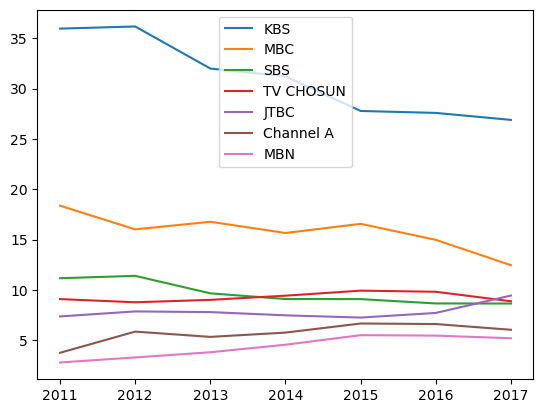

In [4]:
df.plot()

<AxesSubplot:>

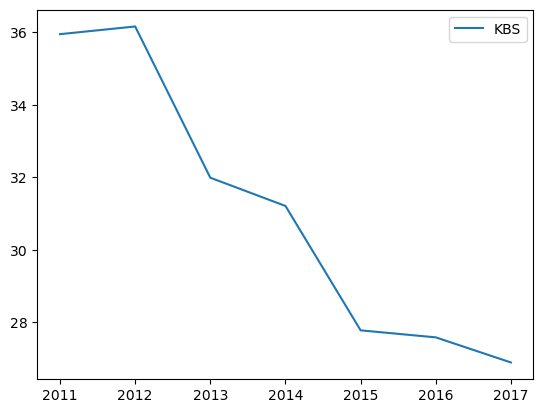

In [6]:
# y파라미터 사용해서 컬럼 지정하기 
df.plot(y='KBS')

<AxesSubplot:>

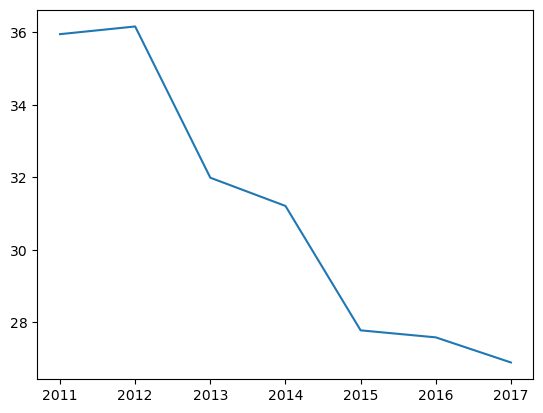

In [5]:
# df에 직접 컬럼 지정해서 그래프 그리기
df['KBS'].plot()

### 05. 막대그래프
- 선그래프 (.plot()) 보다 막대그래프(.plot(kind='bar'))가 더 적합한 경우
- 막대그래프 다루기
    - 가로로 눕히기 : .plot(kind='barh')
    - 값들을 위로 쌓기 : .plot(kind = 'bar', stacked = True)
        - 토탈값으로 비교하기 용이함
    - 하나의 값만 나타내기 : 판다스 시리즈 : df['원하는 컬럼'].plot(kind = 'bar')

In [4]:
# 대한민국 남,녀 운동 선호도

# 데이터 프레임으로 불러오기 
df = pd.read_csv('data/sports.csv', index_col = 0)
df

,Male,Female
Swimming,103,178
Baseball,363,289
Basketball,151,97
Golf,154,232
Soccer,413,109
Bowling,88,129


<AxesSubplot:>

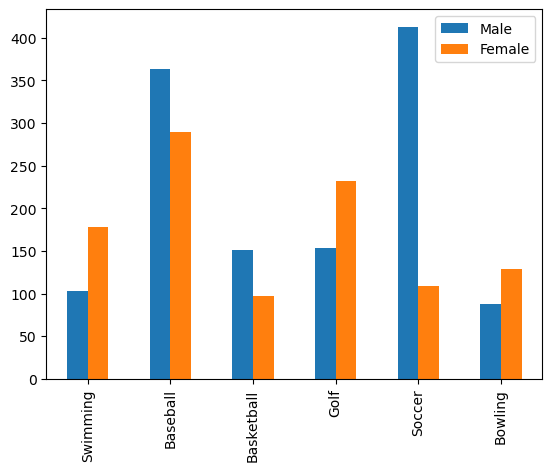

In [5]:
# 막대그래프로 나타내기
df.plot(kind = 'bar')

<AxesSubplot:>

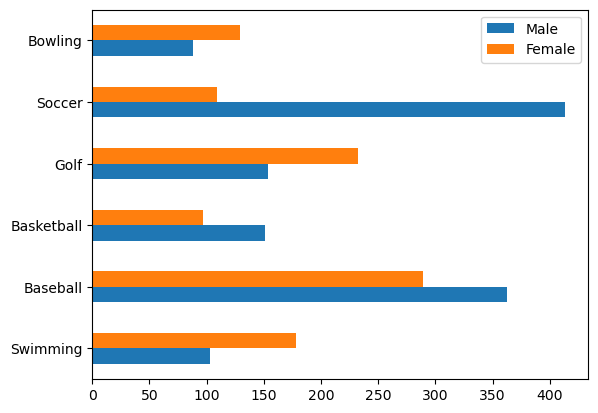

In [7]:
# 막대그래프 가로로 눕히기
df.plot(kind= 'barh') # h = horizontal

<AxesSubplot:>

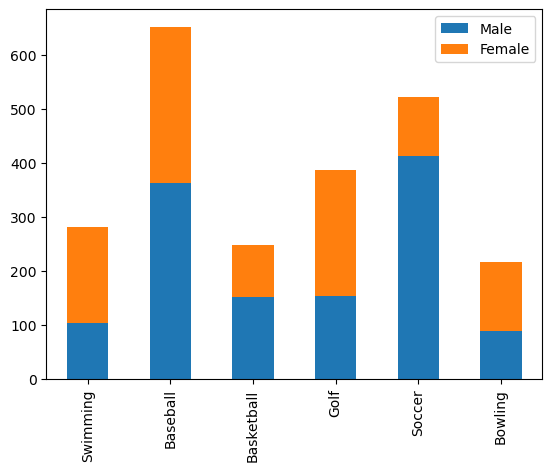

In [8]:
# 위로 쌓기
df.plot(kind="bar", stacked = True)

### 06. [실습]
- 1. gender 칼럼에서 'Male' 값 & 'job' 컬럼에서 'Manager' 조건을 만족하도록 추출 
- 2. race_ethnicity 칼럼에서 'All'값을 뺀 나머지를 사용하도록. 
- 3. 위의 두 조건을 만족할 때, 'race_ethnicity'의 각 값을 'count' 칼럼의 값을 사용하여 그리기 

In [ ]:
# 데이터시각화를 위한 호출
%matplotlib inline
import pandas as pd

# 데이터프레임 불러오기
df = pd.read_csv('data/silicon_valley_summary.csv')

# 1. 관리자 직군 & 남자 
# 'job_category'는 'Managers'이고, 'gender'는 'Male'인 데이터만 뽑음.
boolean_male = df['gender'] == 'Male'
boolean_manager = df['job_category'] == 'Managers'
# (확인용) 두 불린값을 합쳐서 데이터프레임 정리 
# df[boolean_male & boolean_manager]

# 2. 'race_ethnicity'가 'All'인 경우는 제외
boolean_not_all = df['race_ethnicity'] != 'All'
# (1, 2 단계 확인용) 위의 세가지 불린값을 모두 만족하는 것으로 - 데이터프레임 정리
# df[boolean_male & boolean_manager & boolean_not_all]

# 3. plot 메소드로 그래프 그리기
df[boolean_male & boolean_manager & boolean_not_all].plot(kind='bar', x = 'race_ethnicity', y='count') 

### 07. 파이그래프
- 정확한 수치보다 "비율"에 관심 있을 때 (ex. 투표)
- df.plot(kind = 'pie')

<AxesSubplot:ylabel='2017'>

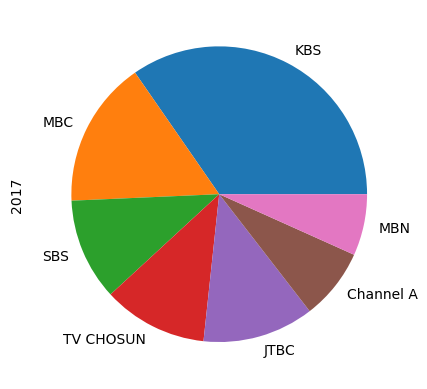

In [14]:
broadcast_df = pd.read_csv('data/broadcast.csv', index_col = 0) # 오류날 때 먼저확인할 것 인덱스 컬럼
broadcast_df.loc[2017].plot(kind='pie')

In [15]:
broadcast_df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215


### [실습] 08.

In [ ]:
# 첫 아이디어 (완성 X)

# 인원이 0인 직군 제외
boolean_not_zero = df['count'] != 0
# job에서 total 값 제외 
boolean_not_totals = df['job_category'] != 'totals'
# 확인
df[boolean_not_zero & boolean_not_totals]

df[boolean_not_zero & boolean_not_totals].plot(kind = 'pie', x = 'job_category', y = 'count')

In [ ]:
# 참고 답안 (완성 O)

%matplotlib inline
import pandas as pd

df = pd.read_csv('data/silicon_valley_details.csv')

##
# 기존 df를 손상시키는 drop, set_index는 첫단계에서 지양할것 

# 한단계에 제거할 수 있는건 제거 & 추출할것만 추출하고 시작 -> 불린 값으로 받는게 편리 
# company가 adobe인 경우 추출 & race 구분값 대신 total 값 사용(그래야 직군 컬럼을 중복값 없이 받을 수 있음) & 인원이 0인 직군 제외 
adobe = (df['company'] == 'Adobe') & (df['race'] == 'Overall_totals') & (df['count'] != 0)

# 함정값 제거
# 직군에 'total'로 표시된 경우 -> adobe 와 합치기 위해 불린값으로 받음 
except_total = (df['job_category'] != 'Totals') & (df['job_category'] != 'Previous_totals')

# adobe 추출 & 함정값 제거해서 합치기 -> 데이터프레임으로 
adobe_job = df[adobe & except_total]

# 파이차트 그리기 전 :  job_category를 인덱스로 지정해야함. => 이름표시를 위함
adobe_job.set_index('job_category', inplace=True)
adobe_job.plot(kind = 'pie', y = 'count')

### 09. 히스토그램
- 적합한 상황 : 1000명 남고생의 키를 조사하고 그래프로 그리고 싶을 때!
- 왜 다른건 안돼? 
    - 선그래프 : 변화추이를 보기 위한 것이므로 X
    - 막대그래프 : 각 키를 항목으로 두기에는 키가 너무 많다!
    - 파이그래프 : 어떤 항목이 차지하는 비율을 보기위한 것인데, 마찬가지로 키가 너무 많다. 
---
#### 히스토그램 특징
- 범위를 설정함으로써 대략적인 값들의 분포를 볼 수 있다.


In [6]:
df = pd.read_csv("data/body.csv", index_col = 0)
df.head(10)

,Height,Weight
Number,,
1,176.0,85.2
2,175.3,67.7
3,168.6,75.2
4,168.1,67.1
5,175.3,63.0
6,175.4,72.7
7,181.5,87.9
8,174.2,64.5
9,176.4,57.5


<AxesSubplot:ylabel='Frequency'>

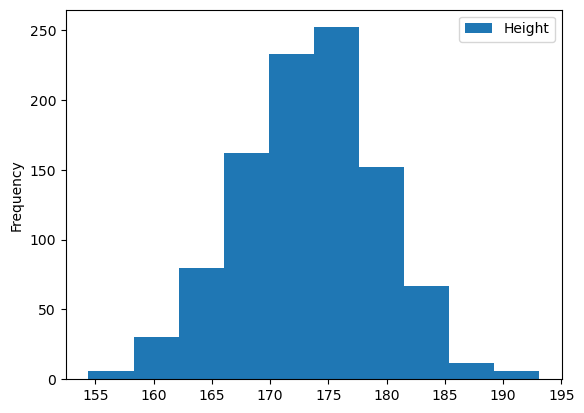

In [8]:
# 히스토그램 그래프 그리기
# 파라미터 y 설정 잊지 말기 : 우리가 보고싶은 컬럼명
df.plot(kind = 'hist', y = 'Height')

<AxesSubplot:ylabel='Frequency'>

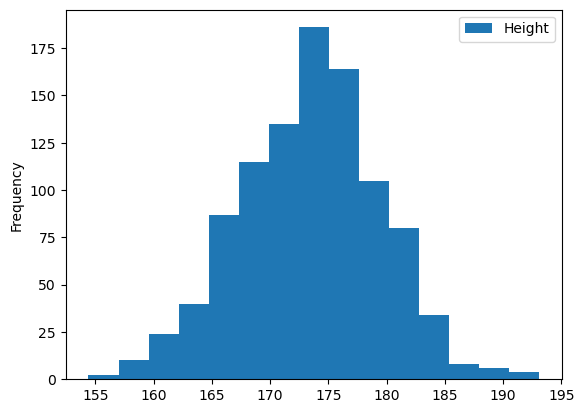

In [10]:
# 범위를 바꾸고 싶다면 bins
# 범위를 더 세세하게 나눈다고 좋은게 아님 -> 상황에 맞게 좋은 인사이트를 주는 범위를 설정해야함
df.plot(kind = 'hist', y = 'Height', bins = 15)

### 박스 플롯
- 특정 데이터셋의 통계정보를 시각적으로 보여주는 자료
- 큰 데이터셋에 대해서도 어느정도 파악을 할 수 있어서 좋음
---

#### 구성 요소
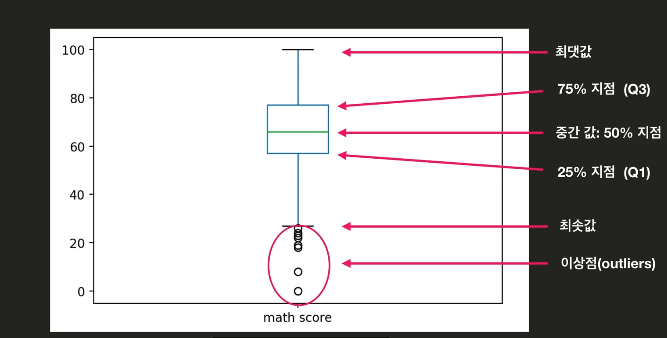
- 이상점(outliers) : 정상적인 범위에서 벗어나서 분석에 방해가 될 수 있는 데이터
    - 이상점을 정하는 기준, Q1&Q3를 계산하는 기준 옵션 (따로 정리) 

---
#### 박스플롯 인사이트
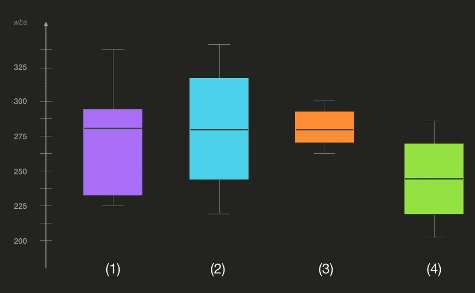
- 길이 비교
    - (3)번은 굉장히 짧은데 (1), (2)는 굉장히 길다
        - 의미) (3)번 값들은 값이 비슷비슷한데 1,2번은 값들이 더 다양하다(=분산되어있다.)
- 높이 비교
    - (3)번이 (4)번보다 대체로 더 위에 있다.
        - 의미) (3)번 데이터셋의 값들이 대체적으로 (4)번 값들보다 더 크다. 
- 균형 비교
    - (1)번이 다른 박스플롯에 비해 균형이 안맞는다. (첫번째 세번째 25%는 짧고, 두번째와 마지막 25%는 길다.)
        - 의미) 짧은 두 구간에서는 값들이 대체로 비슷비슷 || 기다란 두 구간에서는 값들이 분산되어있다.
- 중간값과 모양의 관계성 
    - 1,2,3 번은 모두 중간값이 같은데, 그래프 모양이 모두 다르다!
        - 의미) 데이터셋을 분석할 때 어느 한 수치만 가지고 판단하면 안 된다는 것을 보여줌. 

In [12]:
df = pd.read_csv('data/exam.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
# 수학점수 받기, 통계값 확인 : describe
df['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

<AxesSubplot:>

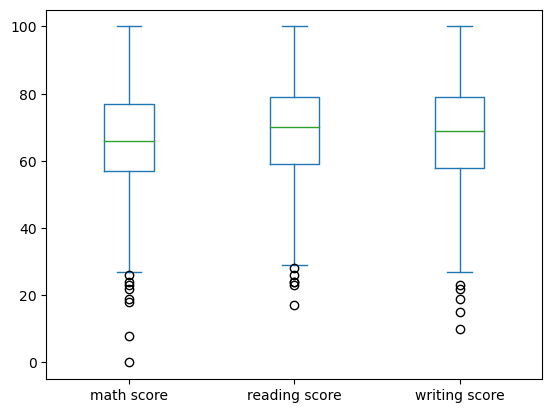

In [17]:
df.plot(kind = 'box', y = ['math score', 'reading score', 'writing score'])

위의 박스 플롯 해석
- 28점 밑으로는 이상점 처리
- 수학 점수 박스가 좀 낮은편
    - 수학 성적이 대체로 낮다
- 읽기점수가 대체로 높다
- 읽기점수가 다른 두 시험에 비해 살짝 짧음
    - 값의 분산도가 낮음
- 상위 하위 값 비교
    - 대체로 상위 25, 하위  25% 는 긴데 가운데 박스는 짧음
        - 상&하위는 값들이 분산되어있음

### 13. 산점도
- 어떤 "상관관계"를 보여주기 적합한 그래프
    - ex) 수학 시험을 잘 본 학생이 영어 시험도 잘봤을까?
---
#### 그래프 읽는 법
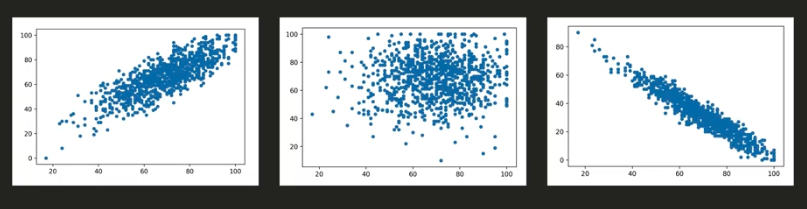
- 1. 우상향 선형으로 나타난다
    - 비례관계의 상관관계가 강하게 나타난다. (ex. x 축이 증가하면 y축이 증가한다.)
- 2. 점이 모이지 않고 흩뿌려져 있다.
    - 연관성이 매우 낮다.
- 3. 선형으로 점들이 모이나, 우하향 한다.
    - 상관관계가 매우 강하지만, 두 특징은 반대된다.

In [19]:
# 산점도 그리기
df = pd.read_csv('data/exam.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:xlabel='math score', ylabel='reading score'>

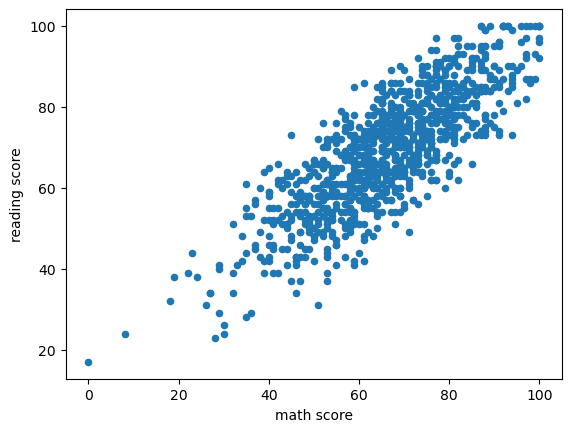

In [21]:
# 수학점수가 높은 학생이 읽기 점수도 높은지 비교
df.plot(kind = 'scatter', x = 'math score', y = 'reading score')

## 분석 ##
# 완전한 일자 선형은 아니지만. 어느정도 선형을 띄고 있으므로 상관관계 있다.
# => 수학점수가 높은 학생은 대체로 읽기 점수도 높다.

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

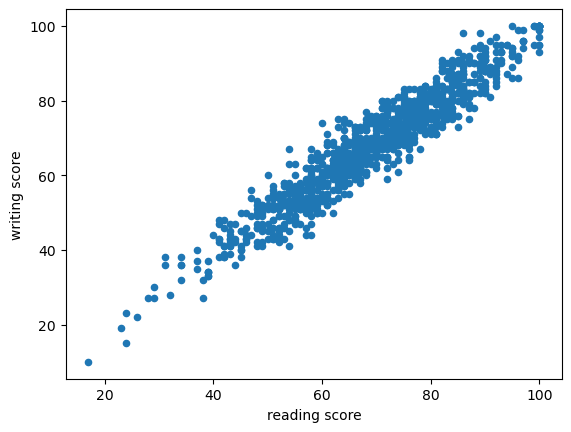

In [22]:
# 읽기점수, 쓰기 점수 비교
df.plot(kind  = 'scatter', x = 'reading score', y = 'writing score')

## 분석 ##
# 수학 ~ 쓰기 보다 더 강한 상관관계가 나타남. 읽기와 쓰기 과목은 유사한 성격을 띄므로 이는 시험 점수에도 영향을 미치는 것으로 보임
# 상대적으로 수학 과목은 성격이 다르므로, 강한 상관관계를 보기는 어렵다.

## 여러 그래프를 그려복 전체적으로 비교 - 인사이트 도출 ##
# 공부를 잘하는 학생은 어느과목을 봐도 점수가 잘 나온다. 
# 읽기와 쓰기 점수는 특히 연관성이 강하다.  

### 14. [실습] 국가 지표 분석하기
- 지표들의 연관성 비교
    - 연관성 -> scatter plot(산점도)
##### 컬럼 설명
- 기대 수명: 'Life expectancy at birth- years'
- 인터넷 사용자 비율: 'Internet users percentage of population 2014'
- 숲 면적 비율: 'Forest area percentage of total land area 2012'
- 탄소 배출 증가율: 'Carbon dioxide emissionsAverage annual growth'

In [23]:
world_df = pd.read_csv('data/world_indexes.csv')
world_df

,Id,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,...,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
0,Norway,0.943877,26.83,7.834,100.000000,0.778925,9.192879,11.914567,5.22,104.194175,...,47.752676,1.654740,111.061300,39.644970,13.772622,31.798391,74.10112,27.288097,0.14,2.8
1,Australia,0.934958,34.01,12.059,100.000000,1.090351,16.519210,-4.561812,30.27,107.789440,...,4.632202,2.385620,135.535430,30.530974,27.711793,65.333748,86.33409,21.361426,0.19,4.0
2,Switzerland,0.929613,32.35,1.900,100.000000,-1.101254,4.625230,8.567416,16.72,99.317229,...,49.659398,2.870460,96.306380,28.455285,28.906998,22.673299,55.56190,9.759124,0.22,4.2
3,Denmark,0.923328,26.88,5.101,100.000000,-1.767733,7.248329,23.029974,1.83,106.057718,...,26.767245,2.984160,124.659270,37.988827,9.909512,39.677938,79.59763,33.395651,0.40,3.5
4,Netherlands,0.921794,28.87,6.165,100.000000,-0.252734,10.064490,5.922602,-4.31,107.474154,...,6.671366,2.156760,129.912770,36.888889,11.724418,23.533104,77.34356,19.724059,0.17,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Burundi,0.399928,33.27,30.256,75.000000,0.630172,0.021909,-41.730104,195.33,140.018625,...,53.544693,0.121260,33.102310,34.931507,2.504071,19.855360,3.16599,11.006974,18.00,82.9
184,Chad,0.391906,43.30,152.015,16.000000,0.861268,0.044623,-13.298246,98.14,109.954331,...,88.289148,0.612717,22.794100,14.893617,3.423823,27.618325,2.25039,15.978897,18.00,147.5
185,Eritrea,0.390899,36.75,65.280,99.333333,2.709607,0.087768,-6.033313,151.49,113.652667,...,78.271531,0.226783,42.522027,22.000000,0.249450,17.402965,2.04323,13.265781,4.60,49.9
186,Central African Republic,0.350131,56.30,98.334,61.000000,-1.829932,0.064475,-2.835840,54.91,108.757088,...,80.467360,0.253410,17.791890,12.500000,2.907818,6.902223,2.84086,9.455153,50.00,139.2


<AxesSubplot:xlabel='Life expectancy at birth- years', ylabel='Internet users percentage of population 2014'>

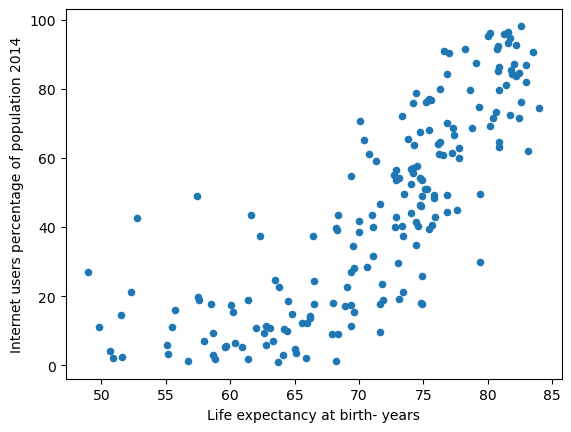

In [36]:
# 기대수명 - 인터넷 사용자 비율
# 가장 선 형태를 보이는 그래프는 이 그래프!
world_df.plot(kind = 'scatter', x = 'Life expectancy at birth- years', y = 'Internet users percentage of population 2014'
)

<AxesSubplot:xlabel='Forest area percentage of total land area 2012', ylabel='Carbon dioxide emissionsAverage annual growth'>

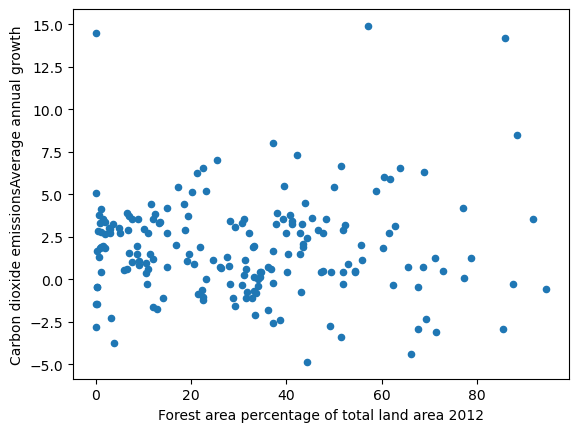

In [27]:
# 숲 면적 비율 - 탄소 배출 증가율
world_df.plot(kind = 'scatter', x = 'Forest area percentage of total land area 2012', y = 'Carbon dioxide emissionsAverage annual growth')

<AxesSubplot:xlabel='Internet users percentage of population 2014', ylabel='Forest area percentage of total land area 2012'>

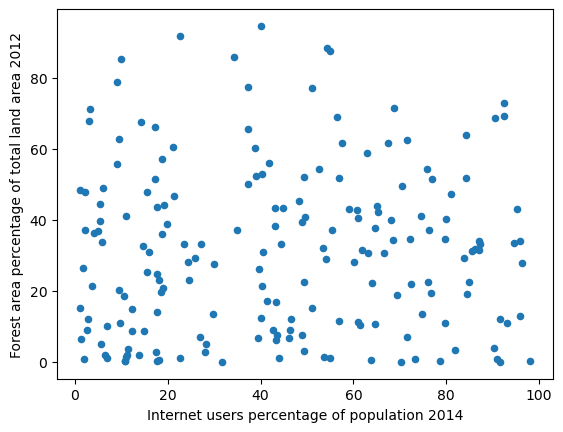

In [30]:
# 인터넷 사용자 비율 - 숲 면적 비율
world_df.plot(kind = 'scatter', x = 'Internet users percentage of population 2014', y = 'Forest area percentage of total land area 2012')

<AxesSubplot:xlabel='Life expectancy at birth- years', ylabel='Carbon dioxide emissionsAverage annual growth'>

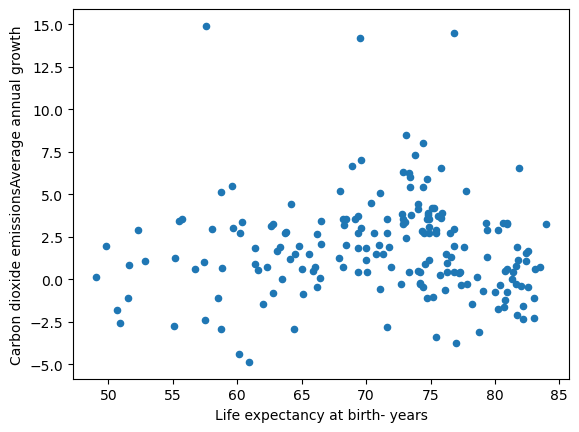

In [33]:
# 기대수명 - 탄소 배출 증가율
world_df.plot(kind = 'scatter', x = 'Life expectancy at birth- years', y = 'Carbon dioxide emissionsAverage annual growth')

<AxesSubplot:xlabel='Life expectancy at birth- years', ylabel='Forest area percentage of total land area 2012'>

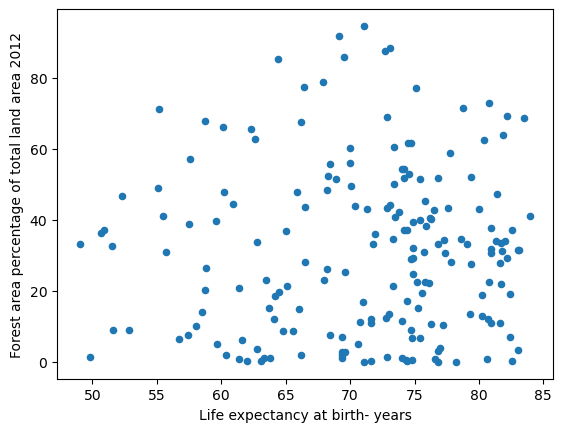

In [35]:
# 기대 수명 - 숲 면적 비율 
world_df.plot(kind = 'scatter', x = 'Life expectancy at birth- years', y = 'Forest area percentage of total land area 2012')